# Notebook for checking latency

In [1]:
# each actor gets there own latency dataframe to check the time of the run step
# concatenate frames together to get total latency for a given frame 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# with spike counts included

In [78]:
gen_df = pd.read_pickle("../latency/generator_latency_20250520-183552.pkl")
processor_df = pd.read_pickle("../latency/processor_latency_20250520-183552.pkl")
viz_df = pd.read_pickle("../latency/visual_latency_20250520-183552.pkl")

# without spike count calculation

In [59]:
gen_df = pd.read_pickle("../latency/generator_latency_20250520-182959.pkl")
processor_df = pd.read_pickle("../latency/processor_latency_20250520-182959.pkl")
viz_df = pd.read_pickle("../latency/visual_latency_20250520-182959.pkl")

In [60]:
gen_df

,frame number,latency
0,0.0,3.292290
1,1.0,0.794006
2,2.0,0.564330
3,3.0,0.641778
4,4.0,0.575348
...,...,...
996,996.0,0.369881
997,997.0,0.462885
998,998.0,0.649996
999,999.0,0.856486


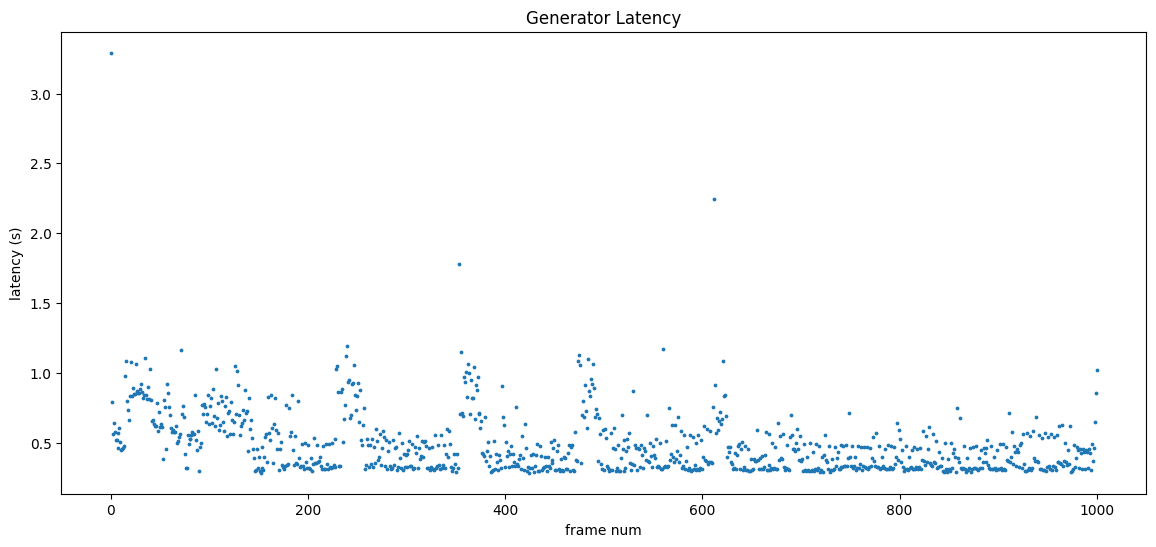

In [61]:
x = list(gen_df["frame number"])
y = list(gen_df["latency"])

plt.figure(figsize=(14, 6))
plt.scatter(x=x,y=y, s=3)
plt.ylabel("latency (s)")
plt.xlabel("frame num")
plt.title("Generator Latency")
plt.show()

In [62]:
print(sum(y) / len(y))

0.488576946053946


Text(0.5, 1.0, 'Generator Latency')

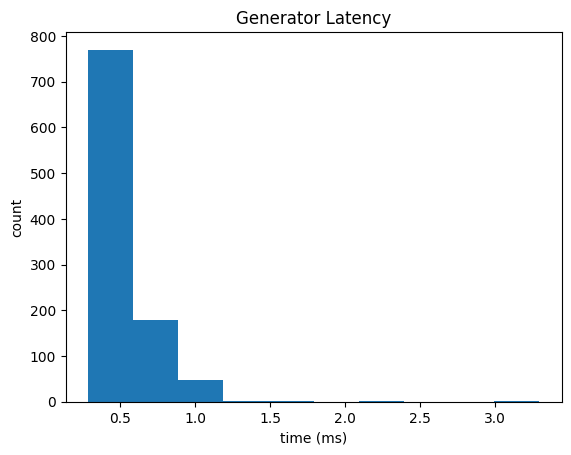

In [63]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Generator Latency")

In [64]:
processor_df

,frame number,latency
0,27.0,21.925662
1,28.0,3.653432
2,29.0,1.993380
3,30.0,1.902523
4,31.0,1.739812
...,...,...
969,996.0,1.993018
970,997.0,1.911667
971,998.0,1.698522
972,999.0,1.807612


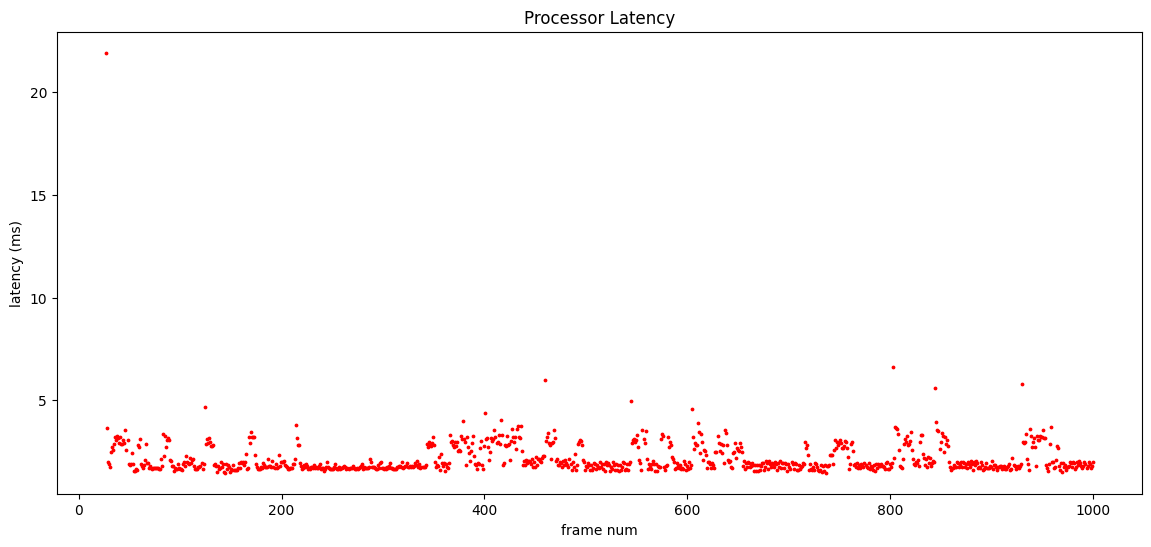

In [65]:
x = list(processor_df["frame number"])
y = list(processor_df["latency"])

plt.figure(figsize=(14, 6))
plt.scatter(x=x,y=y, s=3, c="red")
plt.ylabel("latency (ms)")
plt.xlabel("frame num")
plt.title("Processor Latency")
plt.show()

In [66]:
print(sum(y) / len(y))

2.1690925728952775


Text(0.5, 1.0, 'Processing Time')

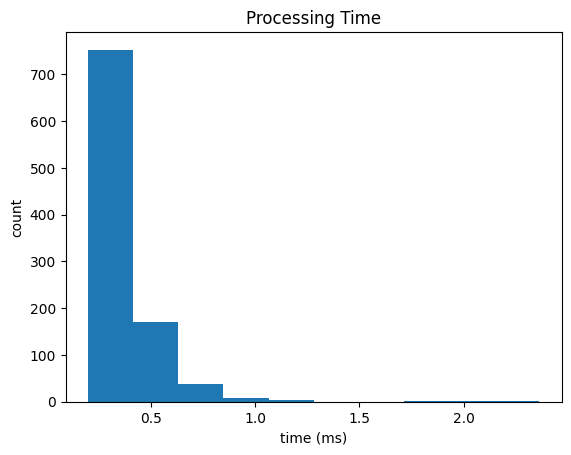

In [77]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Processing Time")

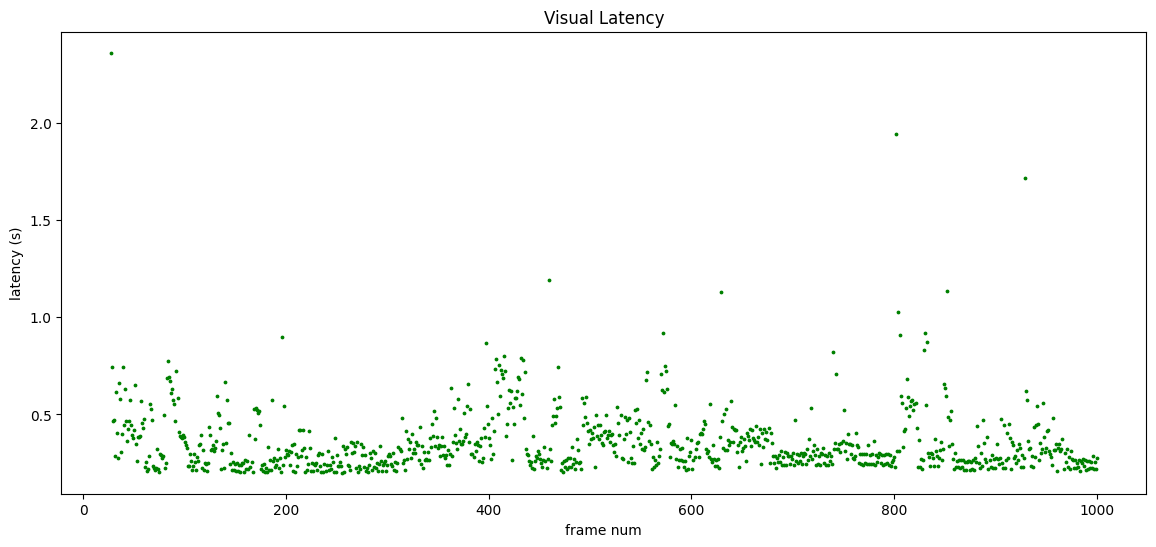

In [68]:
x = list(viz_df["frame number"])
y = list(viz_df["latency"])

plt.figure(figsize=(14, 6))
plt.scatter(x=x,y=y, s=3, c="green")
plt.ylabel("latency (s)")
plt.xlabel("frame num")
plt.title("Visual Latency")
plt.show()

In [69]:
print(sum(y) / len(y))

0.35563723203285424


Text(0.5, 1.0, 'Visual Latency')

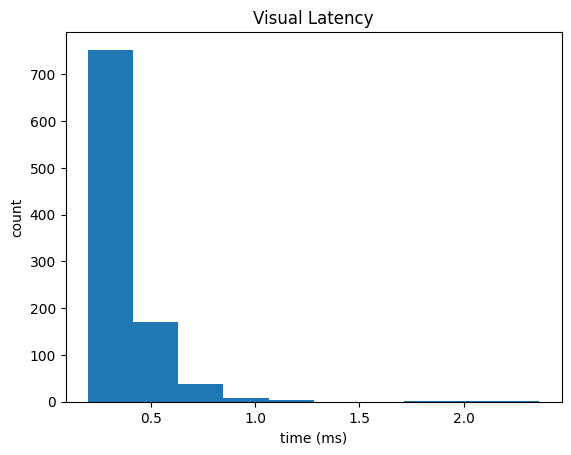

In [70]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Visual Latency")

## Total Latency

In [79]:
gen_y = list(gen_df["latency"])[27:]

In [80]:
proc_y = list(processor_df["latency"])[27:]

In [81]:
viz_y =  list(viz_df["latency"])[27:]

In [82]:
total_latency = [x + y + z for x, y, z in zip(gen_y, proc_y, viz_y)]

Text(0.5, 1.0, 'Total Latency')

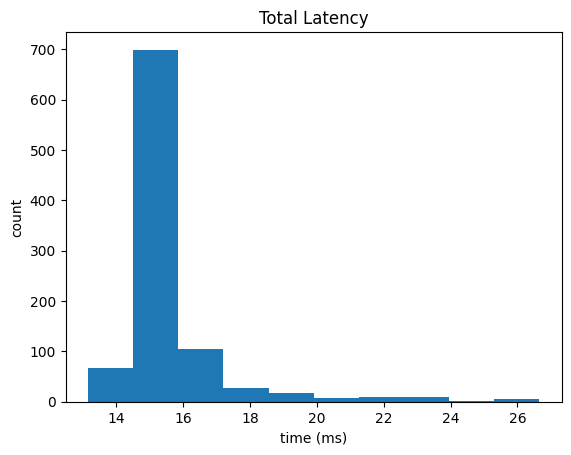

In [83]:
plt.hist(total_latency)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Total Latency")

In [84]:
sum(total_latency) / len(total_latency)

15.595394017951426